In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img

In [ ]:
link = "https://drive.google.com/file/d/17CmqEyh-v2qqLm5sz0cjzPrIji5anPDl/view?usp=share_link"

In [ ]:
id = link.split('d/')[1].split('/view?')[0]
print (id)

17CmqEyh-v2qqLm5sz0cjzPrIji5anPDl


In [ ]:
downloaded = drive.CreateFile({'id':id})  #drive from PyDrive
downloaded.GetContentFile('DATA_FIX_FINAL_NODEBATT.zip')

In [ ]:
import zipfile
zip_file = 'DATA_FIX_FINAL_NODEBATT.zip'
zip_ref = zipfile.ZipFile(zip_file, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
train_dir = '/content/DATA_FIX_FINAL_NODEBATT/TRAIN'
val_dir = '/content/DATA_FIX_FINAL_NODEBATT/TEST'

In [ ]:
# Define the training and validation base directories

# Directory with training PET pictures
train_PET_dir = os.path.join(train_dir, 'PET')
# Directory with training HDPE pictures
train_HDPE_dir = os.path.join(train_dir, 'HDPE')
# Directory with training PP pictures
train_PP_dir = os.path.join(train_dir, 'PP')
# Directory with validation PET pictures
val_PET_dir = os.path.join(val_dir, 'PET')
# Directory with validation HDPE pictures
val_HDPE_dir = os.path.join(val_dir, 'HDPE')
# Directory with validation PP pictures
val_PP_dir = os.path.join(val_dir, 'PP')

# Check the number of images for each class and set
print(f"There are {len(os.listdir(train_PET_dir))} images of PET for training.\n")
print(f"There are {len(os.listdir(train_HDPE_dir))} images of HDPE for training.\n")
print(f"There are {len(os.listdir(train_PP_dir))} images of PP for training.\n")
print(f"There are {len(os.listdir(val_PET_dir))} images of PET for validation.\n")
print(f"There are {len(os.listdir(val_HDPE_dir))} images of HDPE for validation.\n")
print(f"There are {len(os.listdir(val_PP_dir))} images of PP for validation.\n")

There are 2400 images of PET for training.

There are 2400 images of HDPE for training.

There are 2400 images of PP for training.

There are 600 images of PET for validation.

There are 600 images of HDPE for validation.

There are 600 images of PP for validation.



Sample PET image:


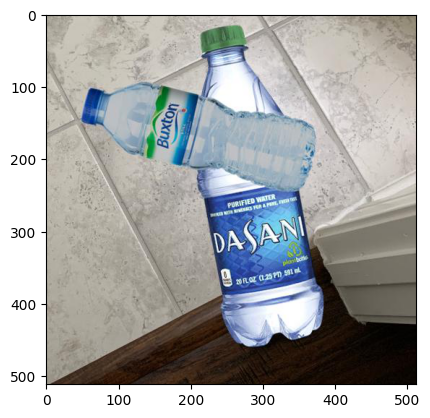


Sample HDPE image:


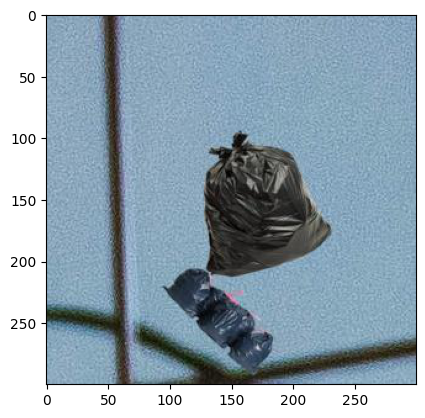


Sample PP image:


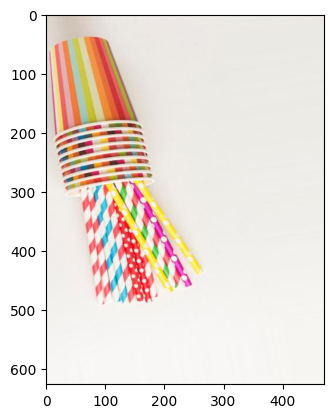

In [ ]:
print("Sample PET image:")
plt.imshow(load_img(f"{os.path.join(train_PET_dir, os.listdir(train_PET_dir)[88])}"))
plt.show()

print("\nSample HDPE image:")
plt.imshow(load_img(f"{os.path.join(train_HDPE_dir, os.listdir(train_HDPE_dir)[99])}"))
plt.show()

print("\nSample PP image:")
plt.imshow(load_img(f"{os.path.join(train_PP_dir, os.listdir(train_PP_dir)[111])}"))
plt.show()

In [ ]:
# Load the first example of a horse
sample_PET_image  = load_img(f"{os.path.join(train_PET_dir, os.listdir(train_PET_dir)[200])}")
sample_HDPE_image  = load_img(f"{os.path.join(train_HDPE_dir, os.listdir(train_HDPE_dir)[170])}")
sample_PP_image  = load_img(f"{os.path.join(train_PP_dir, os.listdir(train_PP_dir)[500])}")

# Convert the image into its numpy array representation
sample_PET_array = img_to_array(sample_PET_image)
sample_HDPE_array = img_to_array(sample_HDPE_image)
sample_PP_array = img_to_array(sample_PP_image)

print(f"Sample PET image has shape: {sample_PET_array.shape}")
print(f"Sample HDPE has shape: {sample_PET_array.shape}")
print(f"Sample PP has shape: {sample_PET_array.shape}")

Sample PET image has shape: (512, 512, 3)
Sample HDPE has shape: (512, 512, 3)
Sample PP has shape: (512, 512, 3)


SKIP THIS

In [ ]:
import os
from PIL import Image

# Define the target shape
target_size = (192, 192)

# Specify the directory containing the images
image_dir = train_PET_dir

# Iterate over all the image files in the directory
for filename in os.listdir(image_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Construct the full path to the image file
        image_path = os.path.join(image_dir, filename)

        # Open and resize the image while preserving aspect ratio
        image = Image.open(image_path)
        image.thumbnail(target_size, Image.ANTIALIAS)

        # Pad or crop the image to the target shape
        padded_image = Image.new("RGB", target_size)
        padded_image.paste(
            image, ((target_size[0] - image.size[0]) // 2, (target_size[1] - image.size[1]) // 2)
        )

        # Save the resized image back to the original file path
        padded_image.save(image_path)

In [ ]:
# Define the target shape
target_size = (192, 192)

# Specify the directory containing the images
image_dir = train_HDPE_dir

# Iterate over all the image files in the directory
for filename in os.listdir(image_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Construct the full path to the image file
        image_path = os.path.join(image_dir, filename)

        # Open and resize the image while preserving aspect ratio
        image = Image.open(image_path)
        image.thumbnail(target_size, Image.ANTIALIAS)

        # Pad or crop the image to the target shape
        padded_image = Image.new("RGB", target_size)
        padded_image.paste(
            image, ((target_size[0] - image.size[0]) // 2, (target_size[1] - image.size[1]) // 2)
        )

        # Save the resized image back to the original file path
        padded_image.save(image_path)

In [ ]:
# Define the target shape
target_size = (192, 192)

# Specify the directory containing the images
image_dir = train_PP_dir

# Iterate over all the image files in the directory
for filename in os.listdir(image_dir):
    if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
        # Construct the full path to the image file
        image_path = os.path.join(image_dir, filename)

        # Open and resize the image while preserving aspect ratio
        image = Image.open(image_path)
        image.thumbnail(target_size, Image.ANTIALIAS)

        # Pad or crop the image to the target shape
        padded_image = Image.new("RGB", target_size)
        padded_image.paste(
            image, ((target_size[0] - image.size[0]) // 2, (target_size[1] - image.size[1]) // 2)
        )

        # Save the resized image back to the original file path
        padded_image.save(image_path)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
# Define the target shape
target_size = (192, 192)

# Specify the directory containing the images
image_dir = val_PET_dir

# Iterate over all the image files in the directory
for filename in os.listdir(image_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Construct the full path to the image file
        image_path = os.path.join(image_dir, filename)

        # Open and resize the image while preserving aspect ratio
        image = Image.open(image_path)
        image.thumbnail(target_size, Image.ANTIALIAS)

        # Pad or crop the image to the target shape
        padded_image = Image.new("RGB", target_size)
        padded_image.paste(
            image, ((target_size[0] - image.size[0]) // 2, (target_size[1] - image.size[1]) // 2)
        )

        # Save the resized image back to the original file path
        padded_image.save(image_path)

In [ ]:
# Define the target shape
target_size = (192, 192)

# Specify the directory containing the images
image_dir = val_HDPE_dir

# Iterate over all the image files in the directory
for filename in os.listdir(image_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Construct the full path to the image file
        image_path = os.path.join(image_dir, filename)

        # Open and resize the image while preserving aspect ratio
        image = Image.open(image_path)
        image.thumbnail(target_size, Image.ANTIALIAS)

        # Pad or crop the image to the target shape
        padded_image = Image.new("RGB", target_size)
        padded_image.paste(
            image, ((target_size[0] - image.size[0]) // 2, (target_size[1] - image.size[1]) // 2)
        )

        # Save the resized image back to the original file path
        padded_image.save(image_path)

In [ ]:
# Define the target shape
target_size = (192, 192)

# Specify the directory containing the images
image_dir = val_PP_dir

# Iterate over all the image files in the directory
for filename in os.listdir(image_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Construct the full path to the image file
        image_path = os.path.join(image_dir, filename)

        # Open and resize the image while preserving aspect ratio
        image = Image.open(image_path)
        image.thumbnail(target_size, Image.ANTIALIAS)

        # Pad or crop the image to the target shape
        padded_image = Image.new("RGB", target_size)
        padded_image.paste(
            image, ((target_size[0] - image.size[0]) // 2, (target_size[1] - image.size[1]) // 2)
        )

        # Save the resized image back to the original file path
        padded_image.save(image_path)

In [ ]:
import os
import cv2

# Specify the directory containing the resized images
resized_dir = train_PET_dir

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(resized_dir) if f.endswith(".jpg") or f.endswith(".png")]

# Load the first image to get the reference shape
first_image_path = os.path.join(resized_dir, image_files[0])
reference_image = cv2.imread(first_image_path)
reference_shape = reference_image.shape[:2]

# Iterate over the remaining images and compare their shapes with the reference shape
for image_file in image_files[1:]:
    image_path = os.path.join(resized_dir, image_file)
    image = cv2.imread(image_path)
    if image.shape[:2] != reference_shape:
        print(f"Image {image_file} has a different shape: {image.shape[:2]}")

In [ ]:
import os
import cv2

# Specify the directory containing the resized images
resized_dir = train_HDPE_dir

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(resized_dir) if f.endswith(".jpg") or f.endswith(".png")]

# Load the first image to get the reference shape
first_image_path = os.path.join(resized_dir, image_files[0])
reference_image = cv2.imread(first_image_path)
reference_shape = reference_image.shape[:2]

# Iterate over the remaining images and compare their shapes with the reference shape
for image_file in image_files[1:]:
    image_path = os.path.join(resized_dir, image_file)
    image = cv2.imread(image_path)
    if image.shape[:2] != reference_shape:
        print(f"Image {image_file} has a different shape: {image.shape[:2]}")

In [ ]:
# Specify the directory containing the resized images
resized_dir = train_PP_dir

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(resized_dir) if f.endswith(".jpg") or f.endswith(".png") or f.endswith(".jpeg")]

# Load the first image to get the reference shape
first_image_path = os.path.join(resized_dir, image_files[0])
reference_image = cv2.imread(first_image_path)
reference_shape = reference_image.shape[:2]

# Iterate over the remaining images and compare their shapes with the reference shape
for image_file in image_files[1:]:
    image_path = os.path.join(resized_dir, image_file)
    image = cv2.imread(image_path)
    if image.shape[:2] != reference_shape:
        print(f"Image {image_file} has a different shape: {image.shape[:2]}")

In [ ]:
# Specify the directory containing the resized images
resized_dir = val_PET_dir

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(resized_dir) if f.endswith(".jpg") or f.endswith(".png")]

# Load the first image to get the reference shape
first_image_path = os.path.join(resized_dir, image_files[0])
reference_image = cv2.imread(first_image_path)
reference_shape = reference_image.shape[:2]

# Iterate over the remaining images and compare their shapes with the reference shape
for image_file in image_files[1:]:
    image_path = os.path.join(resized_dir, image_file)
    image = cv2.imread(image_path)
    if image.shape[:2] != reference_shape:
        print(f"Image {image_file} has a different shape: {image.shape[:2]}")

In [ ]:
# Specify the directory containing the resized images
resized_dir = val_HDPE_dir

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(resized_dir) if f.endswith(".jpg") or f.endswith(".png")]

# Load the first image to get the reference shape
first_image_path = os.path.join(resized_dir, image_files[0])
reference_image = cv2.imread(first_image_path)
reference_shape = reference_image.shape[:2]

# Iterate over the remaining images and compare their shapes with the reference shape
for image_file in image_files[1:]:
    image_path = os.path.join(resized_dir, image_file)
    image = cv2.imread(image_path)
    if image.shape[:2] != reference_shape:
        print(f"Image {image_file} has a different shape: {image.shape[:2]}")

In [ ]:
# Specify the directory containing the resized images
resized_dir = val_PP_dir

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(resized_dir) if f.endswith(".jpg") or f.endswith(".png")]

# Load the first image to get the reference shape
first_image_path = os.path.join(resized_dir, image_files[0])
reference_image = cv2.imread(first_image_path)
reference_shape = reference_image.shape[:2]

# Iterate over the remaining images and compare their shapes with the reference shape
for image_file in image_files[1:]:
    image_path = os.path.join(resized_dir, image_file)
    image = cv2.imread(image_path)
    if image.shape[:2] != reference_shape:
        print(f"Image {image_file} has a different shape: {image.shape[:2]}")

In [ ]:
# Load the first example of a horse
sample_PET_image  = load_img(f"{os.path.join(train_PET_dir, os.listdir(train_PET_dir)[90])}")
sample_HDPE_image  = load_img(f"{os.path.join(train_HDPE_dir, os.listdir(train_HDPE_dir)[170])}")
sample_PP_image  = load_img(f"{os.path.join(train_PP_dir, os.listdir(train_PP_dir)[500])}")

# Convert the image into its numpy array representation
sample_PET_array = img_to_array(sample_PET_image)
sample_HDPE_array = img_to_array(sample_HDPE_image)
sample_PP_array = img_to_array(sample_PP_image)

print(f"Sample PET image has shape: {sample_PET_array.shape}")
print(f"Sample HDPE has shape: {sample_PET_array.shape}")
print(f"Sample PP has shape: {sample_PET_array.shape}")

#img_height = 

Sample PET image has shape: (192, 192, 3)
Sample HDPE has shape: (192, 192, 3)
Sample PP has shape: (192, 192, 3)


CONTINUE **HERE**

In [ ]:
#Load the pre-trained ResNet model without the top (classification) layers:
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(192, 192, 3))

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
#Freeze the base model's layers to prevent them from being trained:
base_model.trainable = False

In [ ]:
#Create the classification head for your model:
model = keras.Sequential([
    base_model,
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    #keras.layers.Dense(256, activation='relu'),
    #keras.layers.Dense(64, activation='relu'),
    #keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(3, activation='softmax')  # num_classes is the number of classes in your dataset
])

In [ ]:
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(192, 192,),
    batch_size=32,
    class_mode='categorical'
)

val_datagen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)
val_generator = val_datagen.flow_from_directory(
    directory=val_dir,
    target_size=(192, 192,),
    batch_size=32,
    class_mode='categorical'
)

Found 7200 images belonging to 3 classes.
Found 1800 images belonging to 3 classes.


In [ ]:
model.fit(train_generator, epochs=10, validation_data=val_generator,verbose=2)

Epoch 1/10
225/225 - 37s - loss: 1.9198 - accuracy: 0.8626 - val_loss: 0.6771 - val_accuracy: 0.9367 - 37s/epoch - 165ms/step
Epoch 2/10
225/225 - 23s - loss: 0.6543 - accuracy: 0.9438 - val_loss: 0.7002 - val_accuracy: 0.9450 - 23s/epoch - 104ms/step
Epoch 3/10
225/225 - 24s - loss: 0.4006 - accuracy: 0.9628 - val_loss: 0.6946 - val_accuracy: 0.9572 - 24s/epoch - 106ms/step
Epoch 4/10
225/225 - 23s - loss: 0.2621 - accuracy: 0.9767 - val_loss: 0.9305 - val_accuracy: 0.9450 - 23s/epoch - 104ms/step
Epoch 5/10
225/225 - 24s - loss: 0.1922 - accuracy: 0.9824 - val_loss: 0.9277 - val_accuracy: 0.9444 - 24s/epoch - 105ms/step
Epoch 6/10
225/225 - 24s - loss: 0.1270 - accuracy: 0.9856 - val_loss: 0.7212 - val_accuracy: 0.9611 - 24s/epoch - 106ms/step
Epoch 7/10
225/225 - 24s - loss: 0.1304 - accuracy: 0.9874 - val_loss: 1.8172 - val_accuracy: 0.9183 - 24s/epoch - 105ms/step
Epoch 8/10
225/225 - 24s - loss: 0.1153 - accuracy: 0.9879 - val_loss: 0.8997 - val_accuracy: 0.9589 - 24s/epoch - 105